In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from scipy.stats import linregress
from sklearn import datasets

In [2]:
file= "Merged/merged_data.csv"
df= pd.read_csv(file)
df.head(10)

,Month,GDP (million),Percent GDP,CPI,Percent CPI,Commodity Index,Seasonally adjusted unemployment (%),Owner Occ. Hsing Dbt / Inc,Interest Rates (%pa),Cash Rate (%),AUD/USD exchange rate
0,Jun-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,2.8,2.3,NaN,NaN,NaN,NaN,NaN,NaN
5,Sep-1923,NaN,NaN,2.9,3.8,NaN,NaN,NaN,NaN,NaN,NaN
6,Dec-1923,NaN,NaN,2.9,4.6,NaN,NaN,NaN,NaN,NaN,NaN
7,Mar-1924,NaN,NaN,2.8,1.4,NaN,NaN,NaN,NaN,NaN,NaN
8,Jun-1924,NaN,NaN,2.8,-1.7,NaN,NaN,NaN,NaN,NaN,NaN
9,Sep-1924,NaN,NaN,2.8,-3.7,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Month', 'GDP (million)', 'Percent GDP', 'CPI', 'Percent CPI',
       'Commodity Index', 'Seasonally adjusted unemployment (%)',
       'Owner Occ. Hsing Dbt / Inc', 'Interest Rates (%pa)', 'Cash Rate (%)',
       'AUD/USD exchange rate'],
      dtype='object')

In [4]:
hhold_fin_exchange_rate_df=df[["Month","Owner Occ. Hsing Dbt / Inc","Cash Rate (%)"]].dropna()
hhold_fin_exchange_rate_df.head(20)


,Month,Owner Occ. Hsing Dbt / Inc,Cash Rate (%)
351,Mar-2010,83.3,3.98
352,Jun-2010,83.8,4.50
353,Sep-2010,83.5,4.50
354,Dec-2010,83.0,4.75
355,Mar-2011,82.3,4.75
356,Jun-2011,81.9,4.75
357,Sep-2011,81.5,4.75
358,Dec-2011,81.4,4.30
359,Mar-2012,81.5,4.25
360,Jun-2012,81.3,3.54


In [5]:
#column for Month for X_Axis variable to plot
x_axis=hhold_fin_exchange_rate_df["Month"]
x_axis

351    Mar-2010
352    Jun-2010
353    Sep-2010
354    Dec-2010
355    Mar-2011
356    Jun-2011
357    Sep-2011
358    Dec-2011
359    Mar-2012
360    Jun-2012
361    Sep-2012
362    Dec-2012
363    Mar-2013
364    Jun-2013
365    Sep-2013
366    Dec-2013
367    Mar-2014
368    Jun-2014
369    Sep-2014
370    Dec-2014
371    Mar-2015
372    Jun-2015
373    Sep-2015
374    Dec-2015
375    Mar-2016
376    Jun-2016
377    Sep-2016
378    Dec-2016
379    Mar-2017
380    Jun-2017
381    Sep-2017
382    Dec-2017
383    Mar-2018
384    Jun-2018
385    Sep-2018
386    Dec-2018
387    Mar-2019
388    Jun-2019
389    Sep-2019
390    Dec-2019
391    Mar-2020
392    Jun-2020
393    Sep-2020
394    Dec-2020
395    Mar-2021
396    Jun-2021
397    Sep-2021
398    Dec-2021
399    Mar-2022
400    Jun-2022
401    Sep-2022
402    Dec-2022
Name: Month, dtype: object

In [10]:
#household debt/income ratio
dbt_inc_ratio=hhold_fin_exchange_rate_df["Owner Occ. Hsing Dbt / Inc"]

#cash rate 
cash_rate=hhold_fin_exchange_rate_df["Cash Rate (%)"]

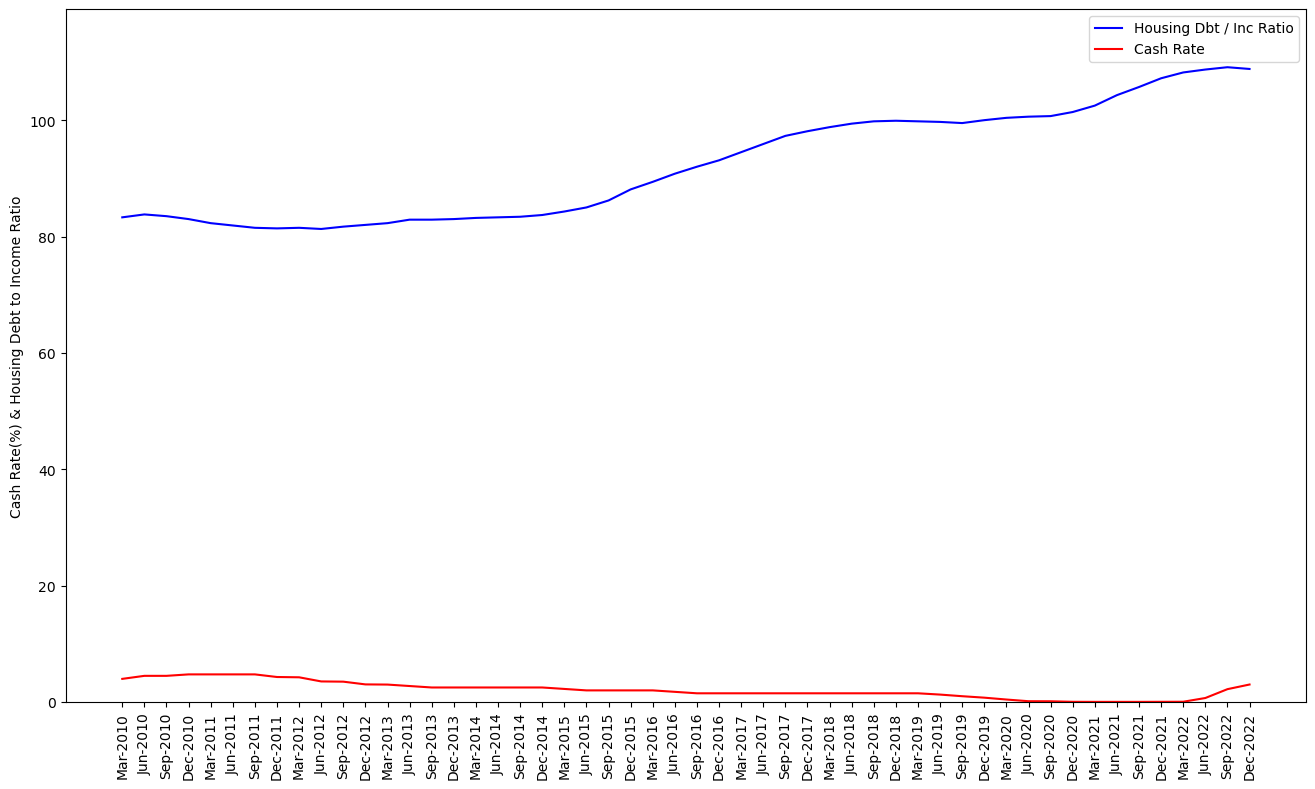

In [11]:
#plot household debt/income ratio and cash rate against month
plt.figure(figsize =(16,9))

dbt_inc_ratio=plt.plot(x_axis,dbt_inc_ratio,color="blue",label="Housing Dbt / Inc Ratio")
cash_rate=plt.plot(x_axis,cash_rate,color="red",label ="Cash Rate")

plt.legend(loc="best")
plt.xticks(rotation="vertical")
plt.xlabel("Month")
plt.ylabel("Cash Rate(%) & Housing Debt to Income Ratio")

plt.ylim(0, max(hhold_fin_exchange_rate_df["Owner Occ. Hsing Dbt / Inc"])+10)



plt.show()

In [ ]:
#Cash rate vs Owner Occ. Hsing Dbt / Inc Ratio
plt.scatter(hhold_fin_exchange_rate_df["Owner Occ. Hsing Dbt / Inc"], hhold_fin_exchange_rate_df["Cash Rate (%)"])
#plt.xlabel("Housing Debt vs Inc Ratio")
plt.ylabel("Cash Rate (%)")
plt.show()

In [ ]:
#correlation between Owner Occ. Hsing Dbt / Inc and Cash rate

dbt_inc = hhold_fin_exchange_rate_df["Owner Occ. Hsing Dbt / Inc"]
cash_rate = hhold_fin_exchange_rate_df["Cash Rate (%)"]
correlation = st.pearsonr(dbt_inc,cash_rate)
print(f'The correlation between Housing Debt/Income and Cash Rate is {round(correlation[0],2)}')

In [ ]:
#r-squared value for the plot

x_values = hhold_fin_exchange_rate_df["Owner Occ. Hsing Dbt / Inc"]
y_values = hhold_fin_exchange_rate_df["Cash Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(95,4),fontsize = 15, color = "red")
#plt.xlabel("Housing Debt vs Inc Ratio")
plt.ylabel("Cash Rate (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()